<a href="https://colab.research.google.com/github/vaibhav1595/MNIST-Digit-Recognizer/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer - The MNIST Database


<p align="center"><img width="400" height="250" src="https://neurohive.io/wp-content/uploads/2019/05/Screenshot-from-2019-05-29-21-23-47.png"></p>

---
### Data Description 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

**About Training data set (42000 Images)** - The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

**About Test data set (28000 Images)** - The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.


---
[Click to view dataset](https://www.kaggle.com/c/digit-recognizer)

In [1]:
# Mounting your Google Drive onto Colab

from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


## Explore Dataset

In [2]:
#### Import Libraries ####

# Data Libraries
import pandas as pd
import numpy as np
import itertools

# Viz Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set(style="darkgrid", context='notebook', palette='deep')
import plotly.graph_objects as go

# Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, LeakyReLU
from keras.optimizers import RMSprop, Adam

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#### Load Dataset ####

train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Digit Recognizer/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Digit Recognizer/test.csv')

In [4]:
# Basic info of Data set

print("Train dataset information:")
print('\n')
train.info()
print('\n')
print("Test dataset information:")
print('\n')
test.info()

Train dataset information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Test dataset information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
# Basic Statistics on numeric columns

print("Train dataset Statistics:")
print('\n')
print(train.describe())
print('\n')
print("Test dataset Statistics:")
print('\n')
print(test.describe())

Train dataset Statistics:


              label   pixel0   pixel1  ...  pixel781  pixel782  pixel783
count  42000.000000  42000.0  42000.0  ...   42000.0   42000.0   42000.0
mean       4.456643      0.0      0.0  ...       0.0       0.0       0.0
std        2.887730      0.0      0.0  ...       0.0       0.0       0.0
min        0.000000      0.0      0.0  ...       0.0       0.0       0.0
25%        2.000000      0.0      0.0  ...       0.0       0.0       0.0
50%        4.000000      0.0      0.0  ...       0.0       0.0       0.0
75%        7.000000      0.0      0.0  ...       0.0       0.0       0.0
max        9.000000      0.0      0.0  ...       0.0       0.0       0.0

[8 rows x 785 columns]


Test dataset Statistics:


        pixel0   pixel1   pixel2  ...  pixel781  pixel782  pixel783
count  28000.0  28000.0  28000.0  ...   28000.0   28000.0   28000.0
mean       0.0      0.0      0.0  ...       0.0       0.0       0.0
std        0.0      0.0      0.0  ...       0.0       0.0 

In [6]:
# Basic Dimension

print("Train: ", train.shape)
print("Test: ", test.shape)

Train:  (42000, 785)
Test:  (28000, 784)


In [7]:
# Examine Null Values

print("Null Values in Train dataset: ",train.isnull().any().sum())
print('\n')
print("Null Values in Test dataset: ",test.isnull().any().sum())

Null Values in Train dataset:  0


Null Values in Test dataset:  0


## Visualize Dataset

[25142  4659 25983 11990  3866  7882]




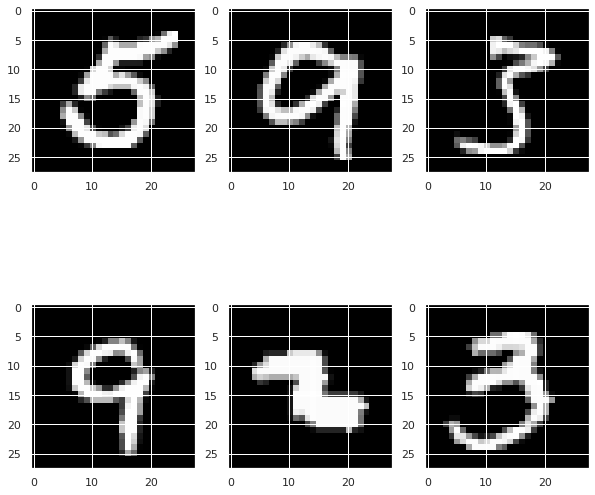

In [8]:
# Plot random images from train dataset
random = np.random.randint(0,42000, size=6)
print(random)
print('\n')

fig, ax = plt.subplots(2,3, figsize=(10,5))
fig.set_size_inches(10,10)
ax[0,0].imshow(train.drop('label',axis=1).values[random[0]].reshape(28,28),cmap='gray')
ax[0,1].imshow(train.drop('label',axis=1).values[random[1]].reshape(28,28),cmap='gray')
ax[0,2].imshow(train.drop('label',axis=1).values[random[2]].reshape(28,28),cmap='gray')
ax[1,0].imshow(train.drop('label',axis=1).values[random[3]].reshape(28,28),cmap='gray')
ax[1,1].imshow(train.drop('label',axis=1).values[random[4]].reshape(28,28),cmap='gray')
ax[1,2].imshow(train.drop('label',axis=1).values[random[5]].reshape(28,28),cmap='gray')


## Data Preprocessing

In [9]:
# Training set size
sample_size = train.shape[0] 

# Validation set size, I am taking it 15% of the training set.
validation_size = int(train.shape[0]*0.15)  

In [10]:
# Prepare Training and Validation data

# taking all columns expect column 0
X_train = np.asarray(train.iloc[:sample_size-validation_size,1:]).reshape([sample_size-validation_size,28,28,1]) 

# taking column 0
y_train = np.asarray(train.iloc[:sample_size-validation_size,0]).reshape([sample_size-validation_size,1]) 

# X_val and y_val
X_val = np.asarray(train.iloc[sample_size-validation_size:,1:]).reshape([validation_size,28,28,1])
y_val = np.asarray(train.iloc[sample_size-validation_size:,0]).reshape([validation_size,1])

In [11]:
# Shape of training set
print("Shape of training set:")
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print('\n')
# Shape of Validation set
print("Shape of Validation set:")
print("X_val",X_val.shape)
print("y_val",y_val.shape)

Shape of training set:
X_train:  (35700, 28, 28, 1)
y_train:  (35700, 1)


Shape of Validation set:
X_val (6300, 28, 28, 1)
y_val (6300, 1)


In [12]:
# Reshape test set
X_test = np.asarray(test.iloc[:,:]).reshape([-1,28,28,1])

#Shape of Validation set
print("X_test: ",X_test.shape)

X_test:  (28000, 28, 28, 1)


In [13]:
# Normalize Pixel Data

# Convert pixel values in range of [0,1]
X_train =  X_train.astype("float32")/255
X_val =  X_val.astype("float32")/255
X_test =  X_test.astype("float32")/255

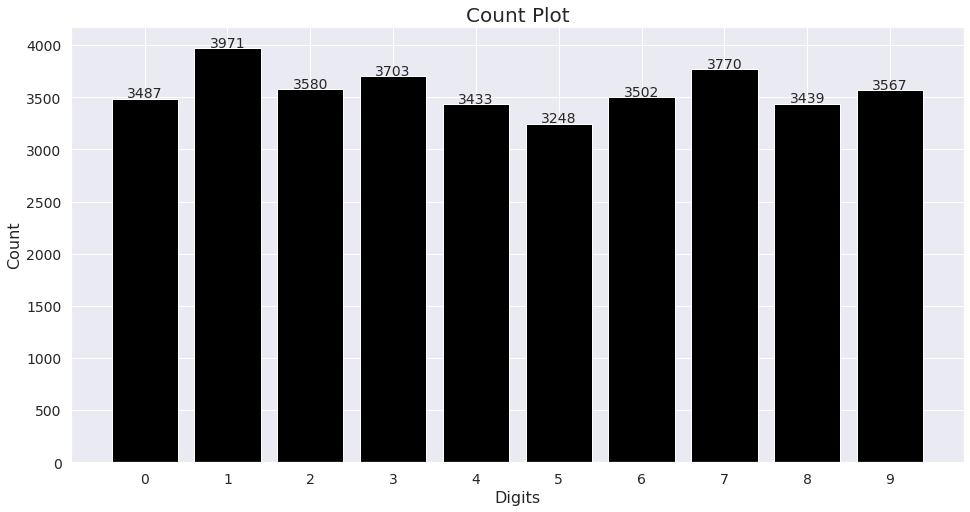

In [14]:
# Visualize frequency of digits In Training set
counts = train.iloc[:sample_size-validation_size,:].groupby('label')['label'].count()
f = plt.figure(figsize=(16,8))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="Black")
for i in counts.index:
    plt.text(i,counts.values[i]+10,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Count Plot",fontsize=20)
plt.savefig('Count_Plot_of_training_set.png')  
plt.show()

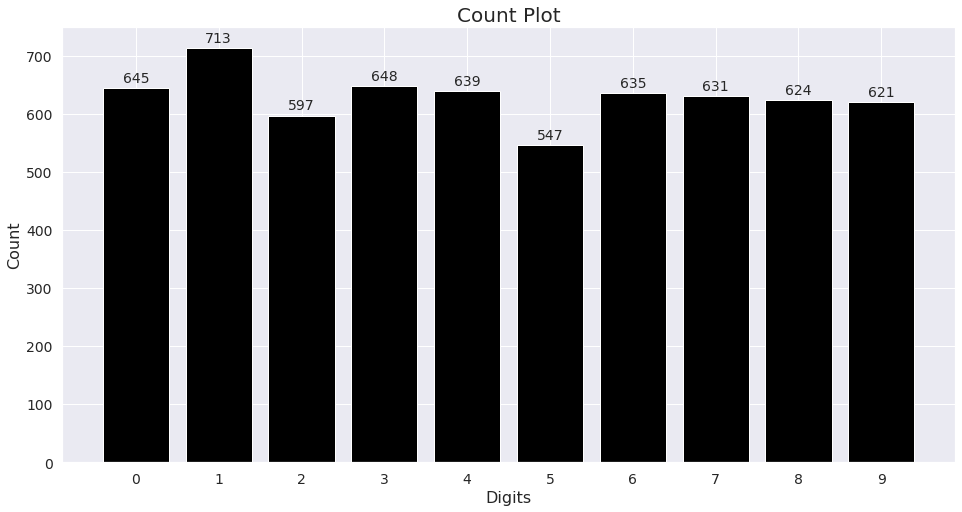

In [15]:
# Visualize frequency of digits In Validation set
counts = train.iloc[sample_size-validation_size:,:].groupby('label')['label'].count()
f = plt.figure(figsize=(16,8))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="Black")
for i in counts.index:
    plt.text(i,counts.values[i]+10,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Count Plot",fontsize=20)
plt.savefig('Count_Plot_of_Validation_set.png')  
plt.show()

## Model Building

In [16]:
model = Sequential()

model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(256,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(12,activation="sigmoid"))

model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

In [17]:
model.fit(X_train,y_train, batch_size=256, epochs = 20, validation_data = (X_val, y_val))

Epoch 1/20
140/140 [==============================] - 5s 34ms/step - loss: 0.6829 - accuracy: 0.7142 - val_loss: 0.0929 - val_accuracy: 0.9711
Epoch 2/20
140/140 [==============================] - 4s 31ms/step - loss: 0.0939 - accuracy: 0.9718 - val_loss: 0.0707 - val_accuracy: 0.9786
Epoch 3/20
140/140 [==============================] - 4s 31ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0469 - val_accuracy: 0.9863
Epoch 4/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0426 - val_accuracy: 0.9868
Epoch 5/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0456 - val_accuracy: 0.9878
Epoch 6/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 7/20
140/140 [==============================] - 4s 32ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0443 - val_accuracy: 0.9898

In [18]:
# Confusion Matrix

p_val = np.argmax(model.predict(X_val),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_val.shape[0]):
    confusion_matrix[y_val[i],p_val[i]] += 1
    if y_val[i]!=p_val[i]:
        error +=1
        
print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/p_val.shape[0],"%")
print("\nAccuracy : " ,100-(error*100)/p_val.shape[0],"%")
print("\nValidation set Shape :",p_val.shape[0])

Confusion Matrix: 

 [[643.   1.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 712.   0.   0.   0.   0.   0.   1.   0.   0.]
 [  1.   0. 592.   2.   0.   0.   0.   1.   1.   0.]
 [  1.   0.   0. 639.   0.   4.   0.   1.   2.   1.]
 [  0.   2.   0.   0. 636.   0.   0.   0.   0.   1.]
 [  0.   0.   0.   0.   0. 544.   2.   0.   0.   1.]
 [  2.   1.   0.   0.   0.   0. 632.   0.   0.   0.]
 [  0.   3.   2.   0.   0.   0.   0. 626.   0.   0.]
 [  0.   0.   3.   0.   0.   2.   6.   0. 612.   1.]
 [  2.   0.   0.   0.   3.   0.   0.   4.   3. 609.]]

Errors in validation set:  55

Error Persentage :  0.873015873015873 %

Accuracy :  99.12698412698413 %

Validation set Shape : 6300


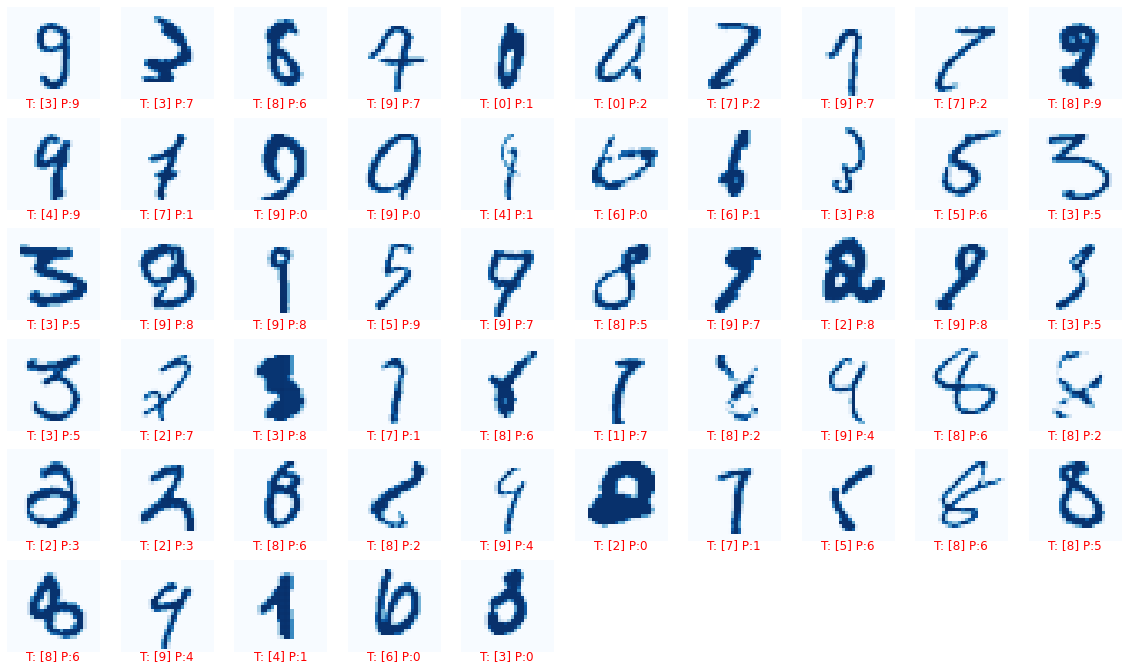

In [19]:
# Errors on Validation Set

rows = 10
cols = 10

f = plt.figure(figsize=(2*cols,2*rows))
sub_plot = 1
for i in range(X_val.shape[0]):
    if y_val[i]!=p_val[i]:
        f.add_subplot(rows,cols,sub_plot) 
        sub_plot+=1
        plt.imshow(X_val[i].reshape([28,28]),cmap="Blues")
        plt.axis("off")
        plt.title("T: "+str(y_val[i])+" P:"+str(p_val[i]), y=-0.15,color="Red")
plt.savefig("error_plots.png")
plt.show()

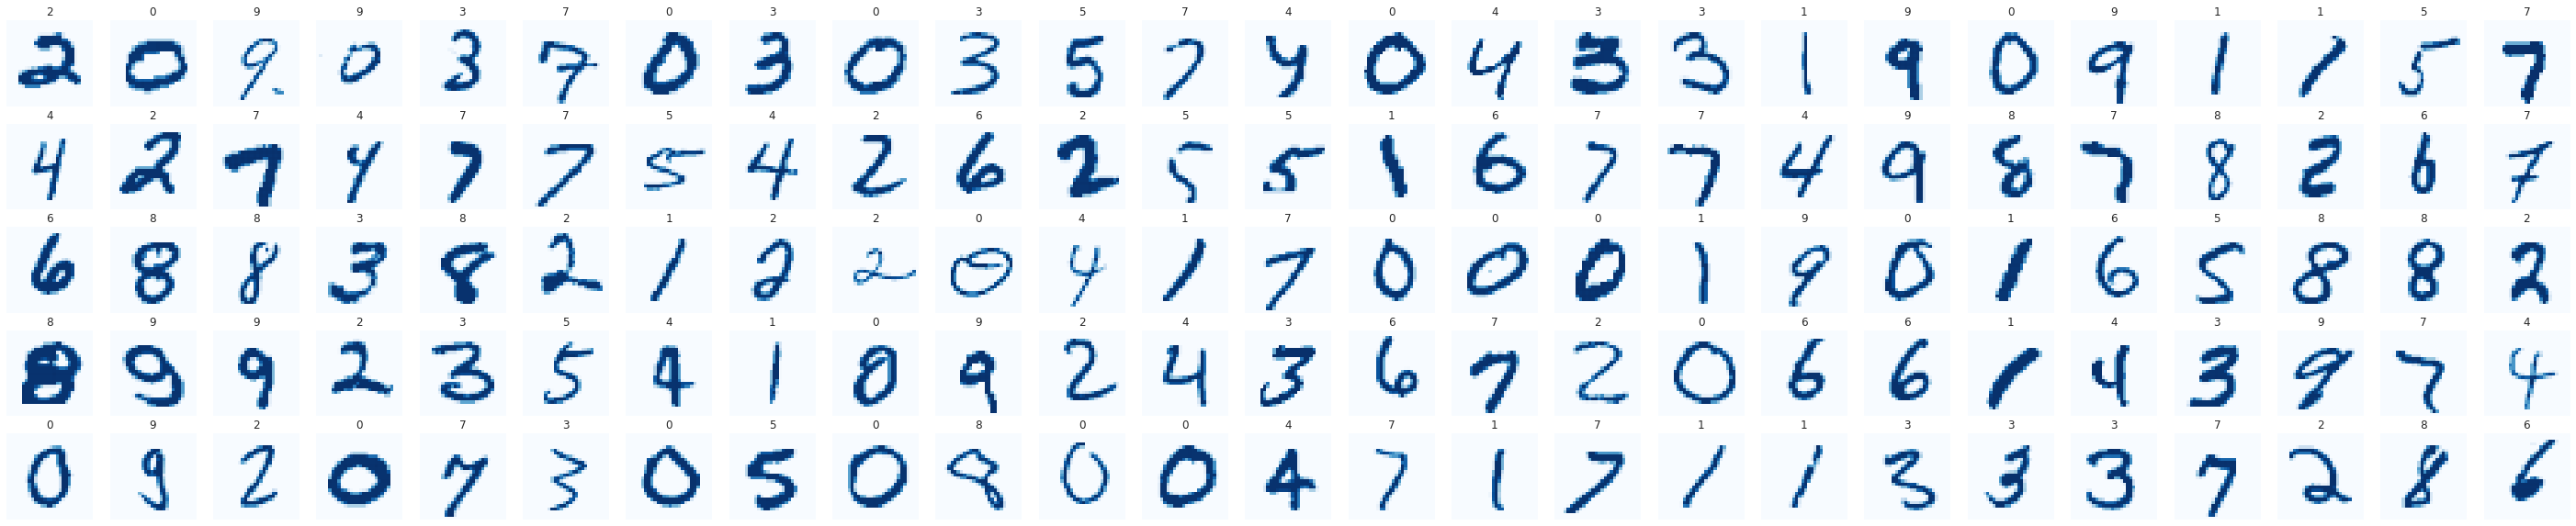

In [20]:
# Predit on Test set

y_test = np.argmax(model.predict(X_test),axis =1)

rows = 5
cols = 25

f = plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(X_test[i].reshape([28,28]),cmap="Blues")
    plt.axis("off")
    plt.title(str(y_test[i]))

plt.savefig("prediction_plot.png")
plt.show()

In [21]:
# Creating submisson
submission = pd.DataFrame([test.index+1,y_test],["ImageId","Label"]).transpose()
submission.to_csv("submission.csv",index=False)